In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import matplotlib.ticker as ticker
pd.options.display.max_rows = 100
pd.options.display.max_columns = None
import scipy.stats as sci
%matplotlib inline 

#merged_df = pd.read_csv('Project1Flatiron/UsedData/Merged_ratings_movies_revenue.csv')

In [2]:
merged_df = pd.read_csv('../UsedData/Merged_ratings_movies_revenue.csv')

# Movie & Revenue

In [3]:
print(merged_df.shape)
merged_df.sort_values(by = 'date', ascending = False, inplace = True)

(30157, 32)


In [4]:
revenue_23 = pd.read_csv('../UsedData/23mRevenue.csv')

In [5]:
revenue_23 = revenue_23.sort_values(by = 'profit', ascending = False)
revenue_23 = revenue_23[revenue_23['budget'] > 0]
print(revenue_23.shape)
revenue_23.head(2)

(8890, 9)


,imdb_id,title,revenue,adult,overview,budget,profit,date,genre
14551,tt0499549,Avatar,2.787965e+09,False,"In the 22nd century, a paraplegic Marine is di...",237000000.0,2.550965e+09,2009.0,Action
26555,tt2488496,Star Wars: The Force Awakens,2.068224e+09,False,Thirty years after defeating the Galactic Empi...,245000000.0,1.823224e+09,2015.0,Action


### Comparing Profits and Genre

In [6]:
sorted_profit = merged_df.sort_values(by = 'profit', ascending = False)
sorted_profit = sorted_profit[sorted_profit['budget'] > 0]
print(sorted_profit.shape)
sorted_profit.head(2)

(6137, 32)


,movieId,title,date,Comedy,Romance,Drama,Children,Crime,Mystery,Action,Documentary,Fantasy,Thriller,Horror,Animation,Adventure,Sci-Fi,(no genres listed),War,Western,Musical,IMAX,Film-Noir,imdb_id,revenue,adult,overview,budget,profit,genre,AvgRating,NumInteractions
10460,72998,Avatar,2009,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,tt0499549,2.787965e+09,False,"In the 22nd century, a paraplegic Marine is di...",237000000.0,2.550965e+09,Action,3.622250,24548
17650,1721,Titanic,1997,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,tt0120338,1.845034e+09,False,"84 years later, a 101-year-old woman named Ros...",200000000.0,1.645034e+09,Drama,3.381152,37712


In [7]:
def plot_genre_budget_revenue_profit(df, year, pos_neg = False): 
    df = df[df.date >= year]
    df = df[df.budget > 0]
    df= df[df.revenue > 0]
    #plt.figure(figsize = (10,8))
    fig, ax = plt.subplots(figsize = (10,8))
    count = df[(df.profit < 0) | (df.profit > 100000000)].genre.value_counts()    


    if pos_neg == 'positive':
        df = df[df.profit > 100000000]
        pos_neg = 'POSITIVE'
        s_factor = 1000000
        tick_color = 'green'
    elif pos_neg == 'negative': 
        df = df[df.profit < 0]
        pos_neg = 'NEGATIVE'
        s_factor = 100000
        tick_color = 'red'
    else: 
        df = df[(df.profit < 0) | (df.profit > 100000000)]
        pos_neg = 'COMBINED'
        s_factor = 1000000
        tick_color = 'black'
    color = pd.Categorical(df.genre.value_counts().index.to_list()).codes
    num_dic = {'#eeefff':'Action', '#F1F906': 'Drama', '2': 'Comedy', '3': 'Adventure', 
                 '4': 'Horror', '5': 'Thriller', '6': 'Crime', '7': 'Family', 
                 '8': 'Animation', '9': 'Romance', '10': 'Mystery', 
                 '11': 'Fantasy', '12': 'War', '13': 'Science Fiction'}
    genre_dic = {value:key for key, value in num_dic.items()}
    for genre in genre_dic.keys():
        genre_count = df.genre.value_counts()
        if genre in genre_count.index.to_list(): 
            g_count = genre_count[genre]
        else: 
            g_count = 0
        new_df = df[df.genre == genre]
        budget = new_df.budget /1000000
        profit = new_df.profit / 1000000
        s = new_df.revenue / s_factor
        if len(budget) < 2 or len(profit) < 2: 
            continue
        pearson = round(sci.stats.pearsonr(budget, profit)[0],3)
        if genre in ['Action', 'Comedy', 'Adventure', 'Drama']: 
            marker = 'H'
        else: 
            marker = 'o'
        perc = round((g_count / count[genre]*100), 2) 
        ax.scatter(budget, profit, cmap = genre_dic[genre], s = s, label = f'{genre} ({perc}%) [r = {pearson}]', alpha = .5, marker = marker)
    lgnd = plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
    for i in range(len(genre_dic.keys())): 
        try:
            lgnd.legendHandles[i]._sizes = [100]
        except: 
            break
    formatter = ticker.StrMethodFormatter('${x:,.0f}')
    ax.yaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_formatter(formatter)
    for ytick, xtick in zip(ax.yaxis.get_major_ticks(), ax.xaxis.get_major_ticks()): 
        ytick.label1.set_visible(True)
        ytick.label2.set_visible(False)
        ytick.label1.set_color(tick_color)  
        xtick.label1.set_visible(True)
        xtick.label2.set_visible(False)
    
    plt.title(f'({pos_neg.upper()})|Comparing Profit(y), Budget(x), and Revenue(size) by Genres (color) [{year}-2019]')
    plt.xlabel('Movie Budget (millions)'); plt.ylabel('Movie Profit(millions)')
    plt.grid()
    plt.savefig(f'../PlotImages/profit_budget_revenue_{pos_neg}[{year}].png', bbox_inches = 'tight')

    
    
#plot_genre_budget_revenue_profit(revenue_23, 2015, pos_neg = 'positive')

In [8]:
def plot_interactions_genre_profit_budget(df, year, pos_neg): 
    #plt.figure(figsize = (10,8))
    fig, ax = plt.subplots(figsize = (10,8))

    df= df[df.revenue > 0]
    df = df[df.date >=year]
    df = df[df.budget > 0]
    count = df[(df.profit < 0) | (df.profit > 100000000)].genre.value_counts()    
    if pos_neg == 'positive':
        df = df[(df.profit > 100000000)]
        pos_neg = 'POSITIVE'
        s_factor = 10
        tick_color = 'green'


    elif pos_neg == 'negative': 
        df = df[(df.profit < 0)]
        pos_neg = 'NEGATIVE'
        s_factor = 1
        tick_color = 'red'

    else: 
        df = df[(df.profit < 0) | (df.profit > 100000000)]
        pos_neg = 'COMBINED'
        s_factor = 10
        tick_color = 'black'


    
    color = pd.Categorical(df.genre.value_counts().index.to_list()).codes
    num_dic = {'#eeefff':'Action', '#F1F906': 'Drama', '2': 'Comedy', '3': 'Adventure', 
                 '4': 'Horror', '5': 'Thriller', '6': 'Crime', '7': 'Family', 
                 '8': 'Animation', '9': 'Romance', '10': 'Mystery', 
                 '11': 'Fantasy', '12': 'War', '13': 'Science Fiction'}
    genre_dic = {value:key for key, value in num_dic.items()}
    for genre in genre_dic.keys():
        genre_count = df.genre.value_counts()
        if genre in genre_count.index.to_list(): 
            g_count = genre_count[genre]
        else: 
            g_count = 0
        new_df = df[df.genre == genre]
        budget = new_df.budget /1000000
        profit = new_df.profit / 1000000
        s = new_df.NumInteractions/ s_factor
        if len(budget) < 2 or len(profit) < 2: 
            continue
        pearson = round(sci.stats.pearsonr(budget, profit)[0],3)
        if genre in ['Action', 'Comedy', 'Adventure', 'Drama']: 
            marker = 'H'
        else: 
            marker = 'o'
        perc = round((g_count / count[genre]*100), 2) 
        ax.scatter(budget, profit, cmap = genre_dic[genre], s = s, label = f'{genre} ({perc}%) [r = {pearson}]', alpha = .5, marker = marker)
    lgnd = plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
    formatter = ticker.StrMethodFormatter('${x:,.0f}')
    ax.yaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_formatter(formatter)
    for ytick, xtick in zip(ax.yaxis.get_major_ticks(), ax.xaxis.get_major_ticks()): 
        ytick.label1.set_visible(True)
        ytick.label2.set_visible(False)
        ytick.label1.set_color(tick_color)  
        xtick.label1.set_visible(True)
        xtick.label2.set_visible(False)
    for i in range(len(genre_dic.keys())): 
        try: 
            lgnd.legendHandles[i]._sizes = [100]
        except: 
            break
    plt.title(f'({pos_neg.upper()}) | Comparing Profit(y), Budget(x), and Interactions(size) by Genres (color) [{year}-2019]')
    plt.xlabel('Movie Budget (millions)'); plt.ylabel('Movie Profit(millions)')
    plt.grid() 
    plt.savefig(f'../PlotImages/profit_budget_interactions_{pos_neg}[{year}].png', bbox_inches = 'tight')



#plot_interactions_genre_profit_budget(sorted_profit, 2015, pos_neg = 'positive')

In [9]:
def plot_ratings_profit_interactions_genre(df, year, pos_neg): 
    #plt.figure(figsize = (10,8))
    fig, ax = plt.subplots(figsize = (10,8))
    df = df[df.date >=year]
    df = df[df.budget > 0]
    df= df[df.revenue > 0]
    count = df[(df.profit < 0) | (df.profit > 100000000)].genre.value_counts()    


    
    if pos_neg == 'positive':
        df = df[(df.profit > 100000000)]
        pos_neg = 'POSITIVE'
        s_factor = 10
        tick_color = 'green'

    elif pos_neg == 'negative': 
        df = df[(df.profit < 0) &  (df.budget > 10000000)]
        pos_neg = 'NEGATIVE'
        s_factor = 1
        tick_color = 'red'

    else: 
        df = df[(df.profit < 0) | (df.profit > 100000000)]
        pos_neg = 'COMBINED'
        s_factor = 10
        tick_color = 'black'
    
    color = pd.Categorical(df.genre.value_counts().index.to_list()).codes
    num_dic = {'#eeefff':'Action', '#F1F906': 'Drama', '2': 'Comedy', '3': 'Adventure', 
                 '4': 'Horror', '5': 'Thriller', '6': 'Crime', '7': 'Family', 
                 '8': 'Animation', '9': 'Romance', '10': 'Mystery', 
                 '11': 'Fantasy', '12': 'War', '13': 'Science Fiction'}
    genre_dic = {value:key for key, value in num_dic.items()}
    for genre in genre_dic.keys():
        genre_count = df.genre.value_counts()
        if genre in genre_count.index.to_list(): 
            g_count = genre_count[genre]
        else: 
            g_count = 0
        new_df = df[df.genre == genre]
        avg_rating = new_df.AvgRating# /1000000
        profit = new_df.profit / 1000000
        s = new_df.NumInteractions/ s_factor
        if len(avg_rating) < 2 or len(profit) < 2: 
            continue
        pearson = round(sci.stats.pearsonr(avg_rating, profit)[0],3)
        if genre in ['Action', 'Comedy', 'Adventure', 'Drama']: 
            marker = 'H'
        else: 
            marker = 'o'
        perc = round((g_count / count[genre]*100), 2) 
        ax.scatter(avg_rating, profit, cmap = genre_dic[genre], s = s, label = f'{genre} ({perc}%) [r = {pearson}]', alpha = .5, marker = marker)
    lgnd = plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
    formatter = ticker.StrMethodFormatter('${x:,.0f}')
    ax.yaxis.set_major_formatter(formatter)
    for tick in ax.yaxis.get_major_ticks(): 
        tick.label1.set_visible(True)
        tick.label2.set_visible(False)
        tick.label1.set_color(tick_color)
    for i in range(len(genre_dic.keys())): 
        try:
            lgnd.legendHandles[i]._sizes = [100]
        except: 
            break
    plt.title(f'({pos_neg.upper()}) | Comparing Profit(y), Average Rating(x), and Interactions(size) by Genres (color) [{year}-2019]')
    plt.xlabel('Average Movie Rating'); plt.ylabel('Movie Profit (millions)')
    plt.grid() 
    plt.savefig(f'../PlotImages/profit_rating_interactions_{pos_neg}[{year}].png', bbox_inches = 'tight')


 

#plot_ratings_profit_interactions_genre(sorted_profit, 2015, 'positive')

In [10]:
def plot_interactions_profit_revenue_genre(df, year, pos_neg): 
    #plt.figure(figsize = (10,8))
    fig, ax = plt.subplots(figsize = (10,8))


    df = df[df.date >=year]
    df = df[df.budget > 0]
    df= df[df.revenue > 0]


    count = df[(df.profit < 0) | (df.profit > 100000000)].genre.value_counts()    


    if pos_neg == 'positive':
        df = df[(df.profit > 100000000)]
        pos_neg = 'POSITIVE'
        s_factor = 1000000
        tick_color = 'green'


    elif pos_neg == 'negative': 
        df = df[(df.profit < 0) &  (df.budget > 10000000)]
        pos_neg = 'NEGATIVE'
        s_factor = 1000000
        tick_color = 'red'
    else: 
        df = df[(df.profit < 0) | (df.profit > 100000000)]
        pos_neg = 'COMBINED'
        s_factor = 1000000
        tick_color = 'black'


    
    color = pd.Categorical(df.genre.value_counts().index.to_list()).codes
    num_dic = {'#eeefff':'Action', '#F1F906': 'Drama', '2': 'Comedy', '3': 'Adventure', 
                 '4': 'Horror', '5': 'Thriller', '6': 'Crime', '7': 'Family', 
                 '8': 'Animation', '9': 'Romance', '10': 'Mystery', 
                 '11': 'Fantasy', '12': 'War', '13': 'Science Fiction'}
    genre_dic = {value:key for key, value in num_dic.items()}
    for genre in genre_dic.keys():
        genre_count = df.genre.value_counts()
        if genre in genre_count.index.to_list(): 
            g_count = genre_count[genre]
        else: 
            g_count = 0
        new_df = df[df.genre == genre]
        #budget = new_df.budget /1000000
        num_interactions = new_df.NumInteractions / 10
        profit = new_df.profit / 1000000
        s = new_df.budget / s_factor
        if len(num_interactions) < 2 or len(profit) < 2: 
            continue
        pearson = round(sci.stats.pearsonr(num_interactions, profit)[0],3)
        if genre in ['Action', 'Comedy', 'Adventure', 'Drama']: 
            marker = 'H'
        else: 
            marker = 'o'
        perc = round((g_count / count[genre]*100), 2) 
        ax.scatter(num_interactions, profit, cmap = genre_dic[genre], s = s, label = f'{genre} ({perc}%) [r = {pearson}]', alpha = .5, marker = marker)
    lgnd = plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
    for i in range(len(genre_dic.keys())): 
        try:
            lgnd.legendHandles[i]._sizes = [100]
        except: 
            break
    formatter = ticker.StrMethodFormatter('${x:,.0f}')
    ax.yaxis.set_major_formatter(formatter)
    for tick in ax.yaxis.get_major_ticks(): 
        tick.label1.set_visible(True)
        tick.label2.set_visible(False)
        tick.label1.set_color(tick_color)
    plt.title(f'({pos_neg.upper()}) | Comparing Profit(y), Number of Interactions(x), and budget(size) by Genres (color) [{year}-2019]')
    plt.xlabel('Number of Interactions (thousands)'); plt.ylabel('Movie Profit(millions)')
    plt.grid() 
    plt.savefig(f'../PlotImages/profit_interactions_budget_{pos_neg}[{year}].png', bbox_inches = 'tight')





#plot_interactions_profit_revenue_genre(sorted_profit, 2015, 'combined')

100%|██████████| 3/3 [00:01<00:00,  2.10it/s]


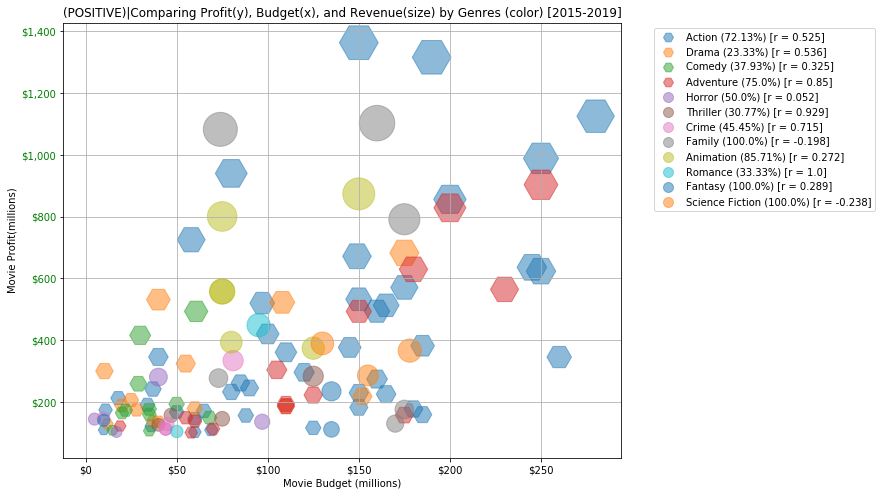

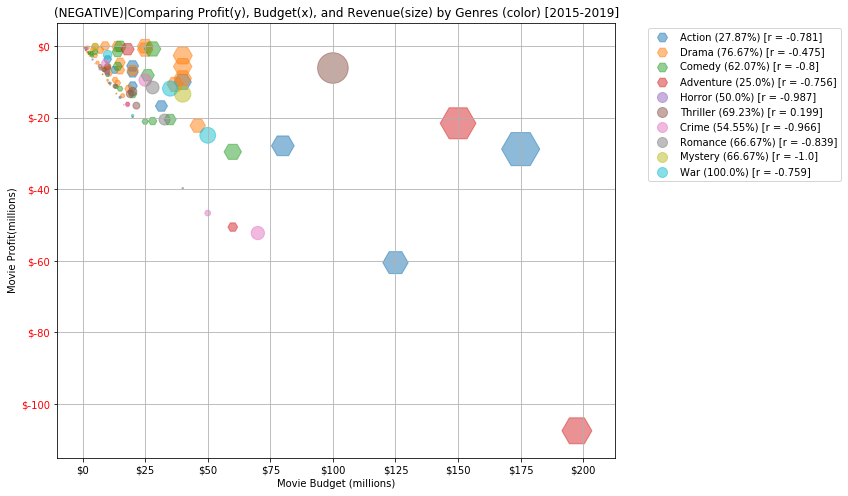

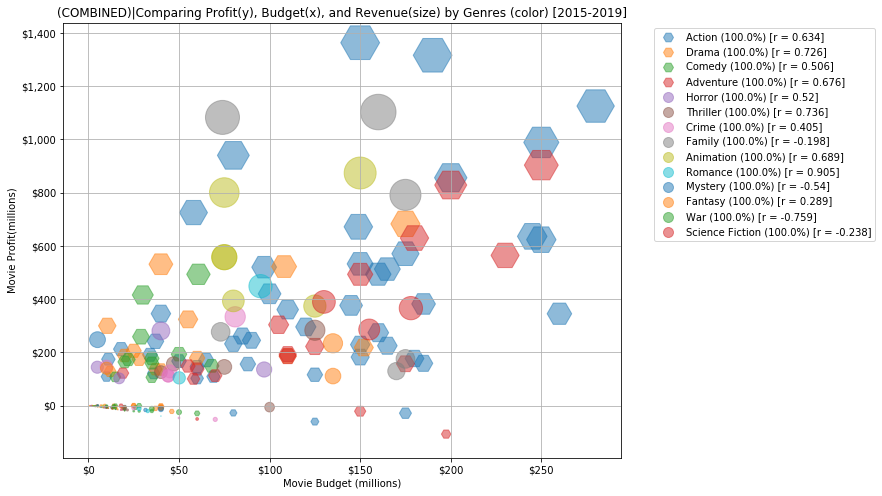

In [11]:
from tqdm import tqdm
for g_type in tqdm('positive negative combined'.split(' ')): 
#     plot_interactions_profit_revenue_genre(sorted_profit, 2015, g_type)
#     plot_ratings_profit_interactions_genre(sorted_profit, 2015, g_type)
#     plot_interactions_genre_profit_budget(sorted_profit, 2015, pos_neg =g_type)
    plot_genre_budget_revenue_profit(sorted_profit, 2015, pos_neg = g_type)

In [12]:
#     elif pos_neg == 'negative': 
#         df = df[(df.profit < 0)]
#         color = pd.Categorical(df.genre.value_counts().index.to_list()).codes
#         num_dic = {'0':'Action', '1': 'Drama', '2': 'Comedy', '3': 'Adventure', 
#                      '4': 'Horror', '5': 'Thriller', '6': 'Crime', '7': 'Family', 
#                      '8': 'Animation', '9': 'Romance', '10': 'Mystery', 
#                      '11': 'Fantasy', '12': 'War', '13': 'Science Fiction'}
#         genre_dic = {value:int(key) for key, value in num_dic.items()}
#         plt.figure(figsize = (10,8))
#         for genre in genre_dic.keys():
#             new_df = df[df.genre == genre]
#             budget = new_df.budget /1000000
#             profit = new_df.profit / 1000000
#             s = new_df.revenue / 100000
#             plt.scatter(budget, profit, cmap = genre_dic[genre], s = s, label = genre, alpha = .6)
#         lgnd = plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
#         for i in range(len(genre_dic.keys())): 
#             lgnd.legendHandles[i]._sizes = [100]
#         plt.title(f'({pos_neg.upper()})|Comparing Profit(y), Budget(x), and Revenue(size) by Genres (color) [{year}-2019]')
#         plt.xlabel('Movie Budget (millions)'); plt.ylabel('Movie Profit(millions)')
#         plt.savefig(f'PlotImages/profit_budget_genre_neg[{year}].png', bbox_inches = 'tight')
#     else: 
#         df = df[(df.profit < 0) | (df.profit > 50000000)]
#         color = pd.Categorical(df.genre.value_counts().index.to_list()).codes
#         num_dic = {'0':'Action', '1': 'Drama', '2': 'Comedy', '3': 'Adventure', 
#                      '4': 'Horror', '5': 'Thriller', '6': 'Crime', '7': 'Family', 
#                      '8': 'Animation', '9': 'Romance', '10': 'Mystery', 
#                      '11': 'Fantasy', '12': 'War', '13': 'Science Fiction'}
#         genre_dic = {value:int(key) for key, value in num_dic.items()}
#         plt.figure(figsize = (10,8))
#         for genre in genre_dic.keys():
#             new_df = df[df.genre == genre]
#             budget = new_df.budget /1000000
#             profit = new_df.profit / 1000000
#             s = new_df.revenue / 100000
#             plt.scatter(budget, profit, cmap = genre_dic[genre], s = s, label = genre, alpha = .6)
#         lgnd = plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
#         for i in range(len(genre_dic.keys())): 
#             lgnd.legendHandles[i]._sizes = [100]
#         plt.title(f'(COMBINED)|Comparing Profit(y), Budget(x), and Revenue(size) by Genres (color) [{year}-2019]')
#         plt.xlabel('Movie Budget (millions)'); plt.ylabel('Movie Profit(millions)')
#         plt.savefig(f'PlotImages/profit_budget_genre_comb[{year}].png', bbox_inches = 'tight')






        
#     grouped_genre = df.groupby('title').first()
#     profits = grouped_genre['profit'].values 
#     revenue = grouped_genre['revenue'].values 
#     budget = grouped_genre['budget'].values 
#     print(profits.max())
#     colors = pd.Categorical(grouped_genre.genre,categories = df.genre.value_counts().index.to_list())
#     print(colors)
#     ax = grouped_genre.plot.scatter(figsize = (12,10),x = 'budget',y = 'profit',  s = revenue/100000, c = colors.codes, 
#                               alpha = .5, cmap = 'Accent')
#     plt.title(f'Comparing Profit(y), Budget(x), and Revenue(size) by Genres (color) [{year}-2019]')
#     plt.xlabel('Movie Budget (one-hundred million)'); plt.ylabel('Movie Revenue(one-hundred million)')